In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
clean_data = pd.read_csv('new_df_withoutmissing.csv')
clean_data

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...
230190,230190,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230191,230191,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230192,230192,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230193,230193,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [3]:
clean_data.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223360
Third Party Name            6835
DateTime                       0
dtype: int64

In [4]:
clean_data = clean_data.drop(['Unnamed: 0', 'Third Party Account No'], axis=1)

In [5]:
data = clean_data.dropna()
data

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [6]:
df = pd.DataFrame(data)

zero_amount_df = df[df['Amount'] == 0]

zero_amount_df

,Account No,Balance,Amount,Third Party Name,DateTime
124098,950234174.0,776.302067,-0.0,Selfridges,2023-07-11 08:21:00
132563,738958551.0,5564.249325,-0.0,Amazon,2023-07-29 18:32:00
134276,730002588.0,12939.954627,-0.0,Fat Face,2023-07-31 17:42:00
146717,581655972.0,34362.247639,-0.0,Fitted Stitch,2023-08-15 05:45:00
168830,322221939.0,3186.856806,-0.0,Revella,2023-09-16 08:04:00
192978,912705941.0,17527.347189,-0.0,Tesco,2023-10-21 05:41:00
197832,520447032.0,7416.909870,-0.0,Lloyds Pharmacy,2023-10-30 09:22:00
213034,824916823.0,8591.033140,-0.0,Sainsbury Local,2023-11-16 05:47:00
219994,687135796.0,28698.757249,-0.0,Sainsbury,2023-11-29 07:29:00


In [7]:
df

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00
...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00


In [8]:
data['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Frankie

In [9]:
holiday_data = {
    'date': ['2025-01-01', '2025-04-18', '2025-12-25', '2025-12-26', '2025-04-18', '2025-04-21', '2025-05-05', '2025-05-26', '2025-08-25'],
    'holiday': ['New Year\'s Day', 'Good Friday', 'Christmas Day', 'Boxing Day', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 'Spring bank holiday', 'Summer bank holiday']
}
df_holidays = pd.DataFrame(holiday_data)
df_holidays

,date,holiday
0,2025-01-01,New Year's Day
1,2025-04-18,Good Friday
2,2025-12-25,Christmas Day
3,2025-12-26,Boxing Day
4,2025-04-18,Good Friday
5,2025-04-21,Easter Monday
6,2025-05-05,Early May bank holiday
7,2025-05-26,Spring bank holiday
8,2025-08-25,Summer bank holiday


In [10]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['month_day'] = df_holidays['date'].dt.strftime('%m-%d')

data['DateTime'] = pd.to_datetime(data['DateTime'])
data['month_day'] = data['DateTime'].dt.strftime('%m-%d')

df_holidays = df_holidays.drop_duplicates(subset=['month_day'])

data['Holiday'] = data['month_day'].map(df_holidays.set_index('month_day')['holiday'])

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/480043795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/480043795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_day'] = data['DateTime'].dt.strftime('%m-%d')
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/480043795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,NaN
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,NaN
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,NaN
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,NaN


In [11]:
data.fillna(False)

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,New Year's Day
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,New Year's Day
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,New Year's Day
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,New Year's Day
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,New Year's Day
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [12]:
def check_holiday(holiday):
    if isinstance(holiday, str):
        return True
    else:
        return False

# appply the function to the 'Holiday' column
data['Holiday'] = data['Holiday'].apply(check_holiday)

data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/3041737322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'] = data['Holiday'].apply(check_holiday)


,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [13]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


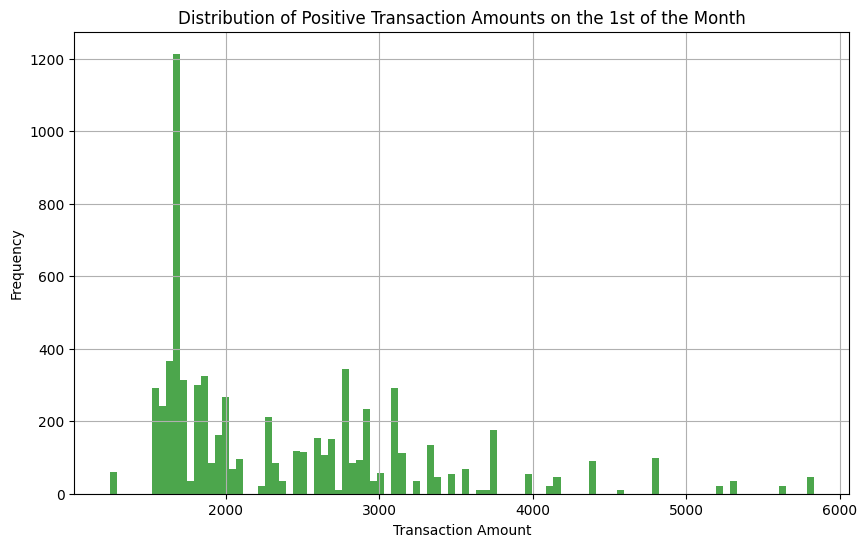

2300.0

In [14]:
# filter to consider only positive transaction amounts on the 1st as it potential to be salary
positive_transactions_on_first = data[data['Amount'] > 0]

# plot the distribution of positive transaction amounts on the 1st
plt.figure(figsize=(10, 6))
plt.hist(positive_transactions_on_first['Amount'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Positive Transaction Amounts on the 1st of the Month')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# calculate the 58th percentile of positive transaction amounts on the 1st as a potential threshold for salary identification
positive_threshold = positive_transactions_on_first['Amount'].quantile(0.58) # from graph of Don said 28,400 is med of income so i devined it into 12
positive_threshold


In [15]:
# # filer data for transactions on the 1st day that are above the threshold
# potential_salaries = data[(data['DateTime'].dt.day == 1) & (data['Amount'] > positive_threshold)]

# # group by account and month to see if these transactions occur consistently
# salary_by_account = potential_salaries.groupby('Account No').apply(lambda x: x['DateTime'].dt.month.unique())

# consistent_salary_accounts = salary_by_account[salary_by_account.apply(len) >= 3]  # cutoff of at least 3 months

# consistent_salary_accounts.head(), len(consistent_salary_accounts)


In [16]:
# salary_account_numbers = set(consistent_salary_accounts.index)
# def flag_salary(row):
#     if (row['Account No'] in salary_account_numbers) and (row['DateTime'].day == 1) and (row['Amount'] > positive_threshold):
#         return True
#     return False

# data['Is_Salary'] = data.apply(flag_salary, axis=1)

# data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].head(10), data[['Account No', 'DateTime', 'Amount', 'Is_Salary']].tail(10)



In [17]:
# data['Is_Salary'].sum()

In [18]:
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False


In [19]:
# data['DayofWeek'] = data['DateTime'].dt.weekday
# data['HourOfDay'] = data['DateTime'].dt.hour
# data['IsWeekend'] = data['DayofWeek'].isin([5, 6])

In [20]:
# data

## Subscribe Transaction

In [21]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
data

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/3612069638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/3612069638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['DateTime'].dt.date
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_69100/3612069638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00:00,01-01,True,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


In [22]:
Fixed_time = ~data['Time'].isin([pd.to_datetime('00:00').time(), pd.to_datetime('23:59').time()])
data = data[Fixed_time]
data = data[data['Amount'] < 0]
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
4665,657139925.0,122.160000,-19.89,Deliveroo,2023-01-01 05:30:00,01-01,True,2023-01-01,05:30:00
4666,546760202.0,840.570000,-27.45,JustEat,2023-01-01 05:41:00,01-01,True,2023-01-01,05:41:00
4667,435313070.0,1318.357427,-1.65,Coop Local,2023-01-01 06:45:00,01-01,True,2023-01-01,06:45:00
4668,804317849.0,1457.668654,-55.37,Selfridges,2023-01-01 07:03:00,01-01,True,2023-01-01,07:03:00
4669,486495235.0,916.023058,-22.02,Sainsbury,2023-01-01 07:46:00,01-01,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


## Transfer from loan

In [23]:
data = data[(data['Third Party Name'] != 'Halifax')]
data = data[data['Third Party Name'] != 'LBG']
data

,Account No,Balance,Amount,Third Party Name,DateTime,month_day,Holiday,Date,Time
4665,657139925.0,122.160000,-19.89,Deliveroo,2023-01-01 05:30:00,01-01,True,2023-01-01,05:30:00
4666,546760202.0,840.570000,-27.45,JustEat,2023-01-01 05:41:00,01-01,True,2023-01-01,05:41:00
4667,435313070.0,1318.357427,-1.65,Coop Local,2023-01-01 06:45:00,01-01,True,2023-01-01,06:45:00
4668,804317849.0,1457.668654,-55.37,Selfridges,2023-01-01 07:03:00,01-01,True,2023-01-01,07:03:00
4669,486495235.0,916.023058,-22.02,Sainsbury,2023-01-01 07:46:00,01-01,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54:00,12-06,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55:00,12-06,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05:00,12-06,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13:00,12-06,False,2023-12-06,21:13:00


In [24]:
# drop the original 'DateTime' column
data = data.drop(['DateTime'], axis=1)

X = data.drop(['Account No'], axis=1)
X



,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time
4665,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00
4666,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00
4667,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00
4668,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00
4669,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00
230191,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00
230192,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00
230193,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00


# With flag column

In [25]:
X = data.drop(['month_day'], axis=1)
X


,Account No,Balance,Amount,Third Party Name,Holiday,Date,Time
4665,657139925.0,122.160000,-19.89,Deliveroo,True,2023-01-01,05:30:00
4666,546760202.0,840.570000,-27.45,JustEat,True,2023-01-01,05:41:00
4667,435313070.0,1318.357427,-1.65,Coop Local,True,2023-01-01,06:45:00
4668,804317849.0,1457.668654,-55.37,Selfridges,True,2023-01-01,07:03:00
4669,486495235.0,916.023058,-22.02,Sainsbury,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...
230190,581655972.0,45935.206861,-41.06,Tesco,False,2023-12-06,20:54:00
230191,786141370.0,-244.837500,-62.35,Sainsbury Local,False,2023-12-06,20:55:00
230192,824916823.0,9709.172159,-32.94,Deliveroo,False,2023-12-06,21:05:00
230193,366550080.0,26834.165794,-19.25,Amazon,False,2023-12-06,21:13:00


In [26]:
X = X.drop(['Account No'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Date,Time
4665,122.160000,-19.89,Deliveroo,True,2023-01-01,05:30:00
4666,840.570000,-27.45,JustEat,True,2023-01-01,05:41:00
4667,1318.357427,-1.65,Coop Local,True,2023-01-01,06:45:00
4668,1457.668654,-55.37,Selfridges,True,2023-01-01,07:03:00
4669,916.023058,-22.02,Sainsbury,True,2023-01-01,07:46:00
...,...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False,2023-12-06,20:54:00
230191,-244.837500,-62.35,Sainsbury Local,False,2023-12-06,20:55:00
230192,9709.172159,-32.94,Deliveroo,False,2023-12-06,21:05:00
230193,26834.165794,-19.25,Amazon,False,2023-12-06,21:13:00


In [27]:
X = X.drop(['Time'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday,Date
4665,122.160000,-19.89,Deliveroo,True,2023-01-01
4666,840.570000,-27.45,JustEat,True,2023-01-01
4667,1318.357427,-1.65,Coop Local,True,2023-01-01
4668,1457.668654,-55.37,Selfridges,True,2023-01-01
4669,916.023058,-22.02,Sainsbury,True,2023-01-01
...,...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False,2023-12-06
230191,-244.837500,-62.35,Sainsbury Local,False,2023-12-06
230192,9709.172159,-32.94,Deliveroo,False,2023-12-06
230193,26834.165794,-19.25,Amazon,False,2023-12-06


In [28]:
X = X.drop(['Date'], axis=1)
X

,Balance,Amount,Third Party Name,Holiday
4665,122.160000,-19.89,Deliveroo,True
4666,840.570000,-27.45,JustEat,True
4667,1318.357427,-1.65,Coop Local,True
4668,1457.668654,-55.37,Selfridges,True
4669,916.023058,-22.02,Sainsbury,True
...,...,...,...,...
230190,45935.206861,-41.06,Tesco,False
230191,-244.837500,-62.35,Sainsbury Local,False
230192,9709.172159,-32.94,Deliveroo,False
230193,26834.165794,-19.25,Amazon,False


In [29]:
# RANDOM_STATE = 10

# # Example function to handle date columns (if you have any)
# def extract_date_parts(df):
#     df['year'] = df['Date'].dt.year
#     df['month'] = df['Date'].dt.month
#     df['day'] = df['Date'].dt.day
#     return df.drop(columns=['Date'])

# # Apply this only if 'date_column' is actually in your dataset
# date_pipeline = Pipeline([
#     ('date_extractor', FunctionTransformer(extract_date_parts, validate=False))
# ])

# # Assuming 'X' is your dataframe and it contains a 'date_column'
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
#         ('scaler', StandardScaler(), ['Balance', 'Amount']),
#         ('date', date_pipeline, ['Date'])  # Include this only if a date column exists
#     ],
#     remainder='passthrough'
# )

# # Fit and transform your features
# X_preprocessed = column_transformer.fit_transform(X)

# # Split into training and validation sets
# X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)


In [30]:
RANDOM_STATE = 10
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Third Party Name']),
        ('scaler', StandardScaler(), ['Balance', 'Amount'])
    ],
    remainder='passthrough'
)


X_preprocessed = column_transformer.fit_transform(X)

X_train, X_val = train_test_split(X_preprocessed, test_size=0.2, random_state=RANDOM_STATE)

In [31]:
# One-Class SVM parem
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['auto', 'scale']
}

# find bes param
best_score = np.inf
best_params = None

for g in ParameterGrid(param_grid):
    model = OneClassSVM(**g)
    model.fit(X_train)
    scores = model.decision_function(X_val)
    score = -scores.mean()
    if score < best_score:
        best_score = score
        best_params = g

print("Best parameters:", best_params)

oc_svm_best = OneClassSVM(**best_params)


Best parameters: {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.1}


In [32]:
oc_svm_best.fit(X_preprocessed)

anomaly_scores = oc_svm_best.decision_function(X_preprocessed)


In [33]:
# anomaly_scores

In [34]:
anomaly_scores_df = pd.DataFrame(anomaly_scores, columns=['Anomaly Score'])

data.reset_index(drop=True, inplace=True)

# concatenate the anomaly scores with the original data
data_with_scores = pd.concat([data, anomaly_scores_df], axis=1)

print(data_with_scores.head())

    Account No      Balance  Amount Third Party Name month_day  Holiday  \
0  657139925.0   122.160000  -19.89        Deliveroo     01-01     True   
1  546760202.0   840.570000  -27.45          JustEat     01-01     True   
2  435313070.0  1318.357427   -1.65       Coop Local     01-01     True   
3  804317849.0  1457.668654  -55.37       Selfridges     01-01     True   
4  486495235.0   916.023058  -22.02        Sainsbury     01-01     True   

         Date      Time  Anomaly Score  
0  2023-01-01  05:30:00      61.697735  
1  2023-01-01  05:41:00     410.685742  
2  2023-01-01  06:45:00     172.462857  
3  2023-01-01  07:03:00    1457.116292  
4  2023-01-01  07:46:00     145.546806  


In [35]:
neg = data_with_scores[data_with_scores['Anomaly Score'] < 0]
neg


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score
64,631111289.0,56.040000,-11.98,The Works,01-01,True,2023-01-01,09:34:00,-107.824782
74,555804115.0,-164.960000,-18.97,Blackwell's,01-01,True,2023-01-01,09:38:00,-61.198344
83,574548998.0,465.040000,-4.99,Blackwell's,01-01,True,2023-01-01,09:41:00,-74.612102
126,843537309.0,385.060000,-4.99,The Works,01-01,True,2023-01-01,10:00:00,-69.523470
143,122884111.0,176.040000,-5.99,The Works,01-01,True,2023-01-01,10:09:00,-124.225932
...,...,...,...,...,...,...,...,...,...
166188,795847804.0,27082.220778,-5.45,Coop Local,12-06,False,2023-12-06,19:02:00,-2116.215820
166207,858989281.0,30313.885119,-2.49,Loosely Fitted,12-06,False,2023-12-06,20:01:00,-2695.115346
166217,975345315.0,40907.910578,-73.71,Tesco,12-06,False,2023-12-06,20:40:00,-2930.451574
166221,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516


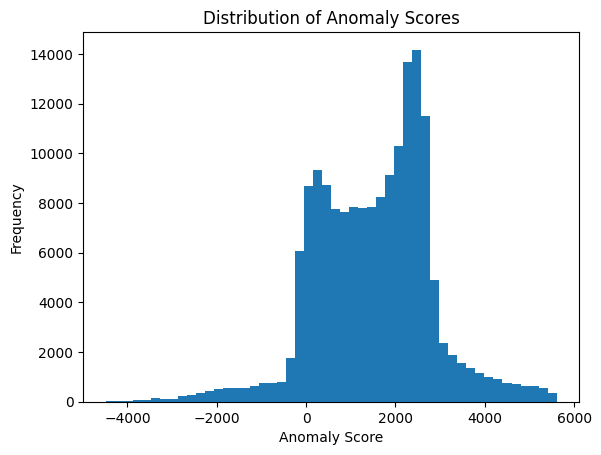

In [36]:
plt.hist(data_with_scores['Anomaly Score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


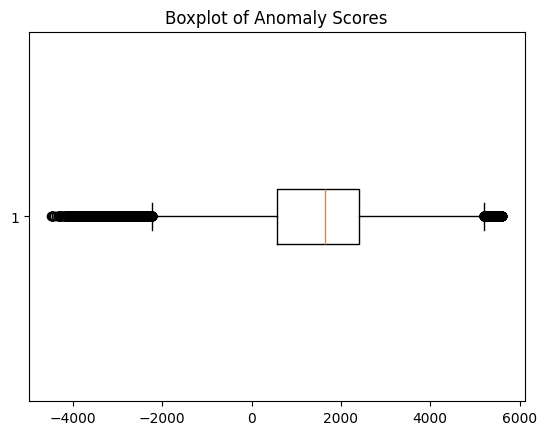

In [37]:
# Boxplot to view outliers
plt.boxplot(data_with_scores['Anomaly Score'], vert=False)
plt.title('Boxplot of Anomaly Scores')
plt.show()

In [38]:
# find threshold of anomaly scores
threshold = np.percentile(anomaly_scores, 0.17)
threshold


-3403.162726390456

In [39]:
# use threshold to identifind the anomaly behavior
data_with_scores['Is_Anomaly'] = anomaly_scores < threshold

data_with_scores


,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,657139925.0,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00,61.697735,False
1,546760202.0,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00,410.685742,False
2,435313070.0,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00,172.462857,False
3,804317849.0,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00,1457.116292,False
4,486495235.0,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00,145.546806,False
...,...,...,...,...,...,...,...,...,...,...
166221,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516,True
166222,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,1508.909900,False
166223,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,2643.318490,False
166224,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2155.591826,False


In [40]:
# neg[neg['Account No']==581655972.0]

In [41]:
data_with_scores[(data_with_scores['Is_Anomaly'] == True) & (data_with_scores['Amount']<=0)] 

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
498,116169597.0,-309.336000,-363.99,Fat Face,01-01,True,2023-01-01,12:15:00,-3474.402571,True
3428,358836279.0,1028.960806,-392.70,Fat Face,01-06,False,2023-01-06,11:13:00,-3647.754527,True
7113,552980092.0,249.362719,-375.90,Fat Face,01-13,False,2023-01-13,09:55:00,-3574.825754,True
19276,918772878.0,-605.609517,-366.10,Revella,02-06,False,2023-02-06,13:24:00,-3515.349948,True
25388,310620484.0,-547.346089,-366.79,Topshop,02-20,False,2023-02-20,16:44:00,-3524.657545,True
...,...,...,...,...,...,...,...,...,...,...
165599,639409800.0,40450.928163,-13.26,Five Senses Art,12-05,False,2023-12-05,17:42:00,-4020.316902,True
165769,975345315.0,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4123.744939,True
165845,558119802.0,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-3803.990889,True
165889,639409800.0,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4045.183077,True


In [42]:
clean_data = clean_data[['Account No', 'DateTime', 'Balance', 'Amount']]
clean_data


,Account No,DateTime,Balance,Amount
0,678330503.0,2023-01-01 00:00:00,2971.000000,1584.00
1,472213568.0,2023-01-01 00:00:00,3792.000000,1950.00
2,472213568.0,2023-01-01 00:00:00,3012.000000,-780.00
3,283027736.0,2023-01-01 00:00:00,1787.000000,780.00
4,624500124.0,2023-01-01 00:00:00,3226.000000,1825.00
...,...,...,...,...
230190,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06
230191,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35
230192,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94
230193,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25


In [43]:
data_with_scores

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,657139925.0,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00,61.697735,False
1,546760202.0,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00,410.685742,False
2,435313070.0,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00,172.462857,False
3,804317849.0,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00,1457.116292,False
4,486495235.0,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00,145.546806,False
...,...,...,...,...,...,...,...,...,...,...
166221,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516,True
166222,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,1508.909900,False
166223,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,2643.318490,False
166224,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2155.591826,False


In [44]:
data_with_scores = pd.merge(clean_data, data_with_scores, on=['Account No', 'Balance', 'Amount'], how='inner')
data_with_scores



,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,657139925.0,2023-01-01 05:30:00,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00,61.697735,False
1,546760202.0,2023-01-01 05:41:00,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00,410.685742,False
2,435313070.0,2023-01-01 06:45:00,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00,172.462857,False
3,804317849.0,2023-01-01 07:03:00,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00,1457.116292,False
4,486495235.0,2023-01-01 07:46:00,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00,145.546806,False
...,...,...,...,...,...,...,...,...,...,...,...
166221,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516,True
166222,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,1508.909900,False
166223,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,2643.318490,False
166224,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2155.591826,False


In [45]:
data_with_scores['DateTime'] = pd.to_datetime(data_with_scores['DateTime'])
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly
0,657139925.0,2023-01-01 05:30:00,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00,61.697735,False
1,546760202.0,2023-01-01 05:41:00,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00,410.685742,False
2,435313070.0,2023-01-01 06:45:00,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00,172.462857,False
3,804317849.0,2023-01-01 07:03:00,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00,1457.116292,False
4,486495235.0,2023-01-01 07:46:00,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00,145.546806,False
...,...,...,...,...,...,...,...,...,...,...,...
166221,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516,True
166222,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,1508.909900,False
166223,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,2643.318490,False
166224,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2155.591826,False


In [46]:
data_with_scores['DayofWeek'] = data_with_scores['DateTime'].dt.weekday
data_with_scores['HourOfDay'] = data_with_scores['DateTime'].dt.hour
data_with_scores['IsWeekend'] = data_with_scores['DayofWeek'].isin([5, 6])

In [47]:
data_with_scores[data_with_scores['Is_Anomaly']==True]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
498,116169597.0,2023-01-01 12:15:00,-309.336000,-363.99,Fat Face,01-01,True,2023-01-01,12:15:00,-3474.402571,True,6,12,True
3428,358836279.0,2023-01-06 11:13:00,1028.960806,-392.70,Fat Face,01-06,False,2023-01-06,11:13:00,-3647.754527,True,4,11,False
7113,552980092.0,2023-01-13 09:55:00,249.362719,-375.90,Fat Face,01-13,False,2023-01-13,09:55:00,-3574.825754,True,4,9,False
19276,918772878.0,2023-02-06 13:24:00,-605.609517,-366.10,Revella,02-06,False,2023-02-06,13:24:00,-3515.349948,True,0,13,False
25388,310620484.0,2023-02-20 16:44:00,-547.346089,-366.79,Topshop,02-20,False,2023-02-20,16:44:00,-3524.657545,True,0,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165599,639409800.0,2023-12-05 17:42:00,40450.928163,-13.26,Five Senses Art,12-05,False,2023-12-05,17:42:00,-4020.316902,True,1,17,False
165769,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4123.744939,True,2,5,False
165845,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-3803.990889,True,2,7,False
165889,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4045.183077,True,2,8,False


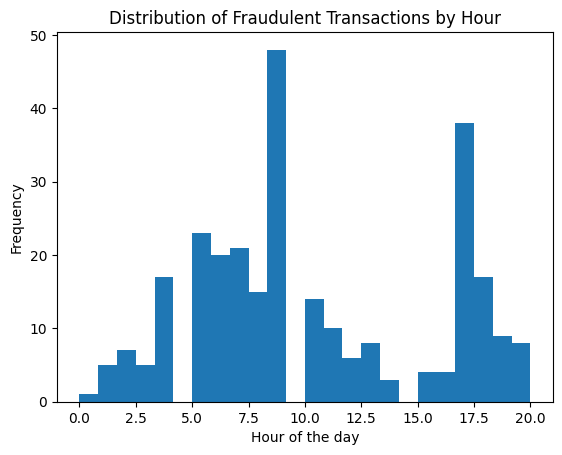

In [48]:
plt.hist(data_with_scores.loc[data_with_scores['Is_Anomaly'], 'HourOfDay'], bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()


In [49]:
flagged_df = data_with_scores[data_with_scores['Is_Anomaly']]

# find the most common values for certain columns
common_third_party_names = flagged_df['Third Party Name'].value_counts()
common_days = flagged_df['DayofWeek'].value_counts()
common_hours = flagged_df['HourOfDay'].value_counts()
common_weekend_status = flagged_df['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)



Common Third Party Names in Flagged Transactions:
 Third Party Name
Coffee #1            25
The Works            25
Amazon               25
Tesco                22
Fat Face             17
Topshop              15
Revella              12
Selfridges           12
Fitted Stitch        11
Lloyds Pharmacy      10
Etsy                 10
AMAZON               10
Sainsbury Local       9
Starbucks             9
JustEat               9
Loosely Fitted        8
Matalan               8
Sports Direct         7
Boots                 7
Sainsbury             7
Brilliant Brushes     6
Coop Local            5
Deliveroo             4
Five Senses Art       4
Wool                  3
Hobby Lobby           3
Name: count, dtype: int64


In [50]:
print("\nCommon Days of Week in Flagged Transactions:\n", common_days)
print("\nCommon Hours of Day in Flagged Transactions:\n", common_hours)
print("\nIs it Commonly on Weekends?:\n", common_weekend_status)


Common Days of Week in Flagged Transactions:
 DayofWeek
5    53
0    44
1    40
4    39
3    39
6    35
2    33
Name: count, dtype: int64

Common Hours of Day in Flagged Transactions:
 HourOfDay
9     48
17    38
5     23
7     21
6     20
18    17
4     17
8     15
10    14
11    10
19     9
13     8
20     8
2      7
12     6
3      5
1      5
15     4
16     4
14     3
0      1
Name: count, dtype: int64

Is it Commonly on Weekends?:
 IsWeekend
False    195
True      88
Name: count, dtype: int64


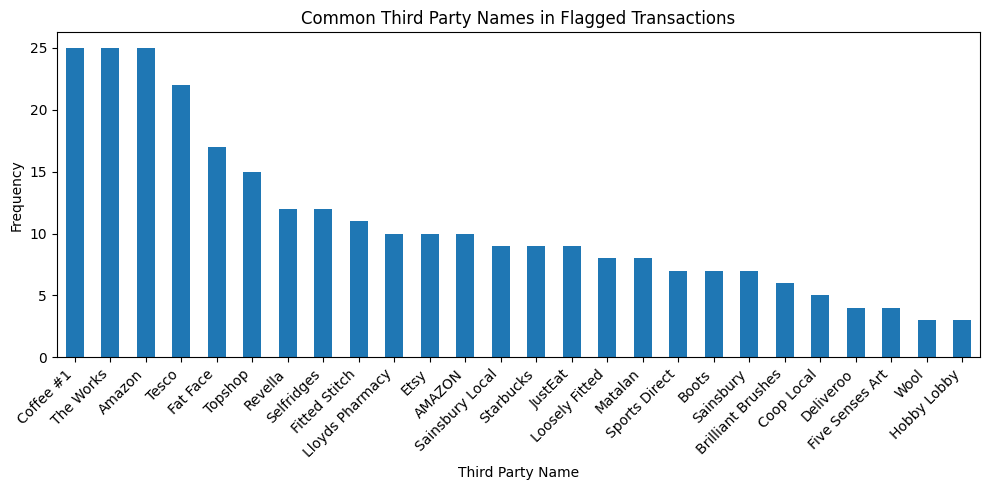

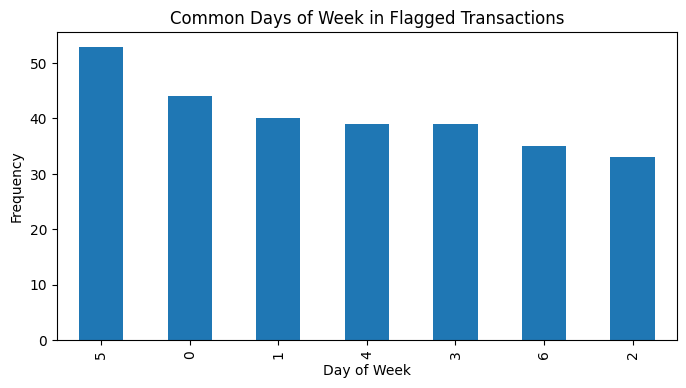

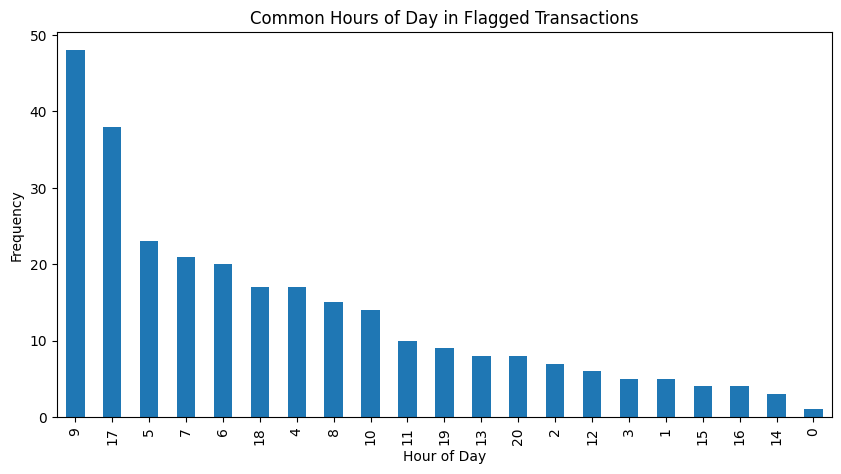

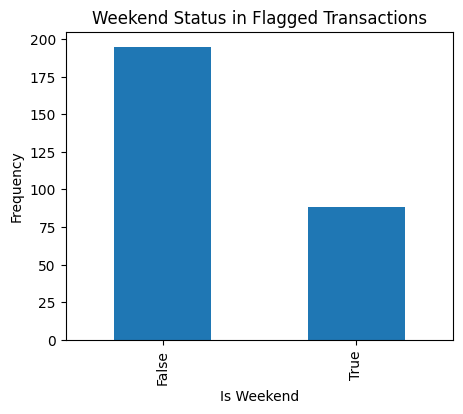

In [51]:
plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in Flagged Transactions')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Common Days of Week in Flagged Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Common Hours of Day in Flagged Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in Flagged Transactions')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()


In [52]:
data_with_scores

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
0,657139925.0,2023-01-01 05:30:00,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00,61.697735,False,6,5,True
1,546760202.0,2023-01-01 05:41:00,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00,410.685742,False,6,5,True
2,435313070.0,2023-01-01 06:45:00,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00,172.462857,False,6,6,True
3,804317849.0,2023-01-01 07:03:00,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00,1457.116292,False,6,7,True
4,486495235.0,2023-01-01 07:46:00,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00,145.546806,False,6,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166221,581655972.0,2023-12-06 20:54:00,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00,-4202.364516,True,2,20,False
166222,786141370.0,2023-12-06 20:55:00,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00,1508.909900,False,2,20,False
166223,824916823.0,2023-12-06 21:05:00,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00,2643.318490,False,2,21,False
166224,366550080.0,2023-12-06 21:13:00,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00,-2155.591826,False,2,21,False


In [53]:
anomalous_transactions = flagged_df.copy()
anomalous_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
498,116169597.0,2023-01-01 12:15:00,-309.336000,-363.99,Fat Face,01-01,True,2023-01-01,12:15:00,-3474.402571,True,6,12,True
3428,358836279.0,2023-01-06 11:13:00,1028.960806,-392.70,Fat Face,01-06,False,2023-01-06,11:13:00,-3647.754527,True,4,11,False
7113,552980092.0,2023-01-13 09:55:00,249.362719,-375.90,Fat Face,01-13,False,2023-01-13,09:55:00,-3574.825754,True,4,9,False
19276,918772878.0,2023-02-06 13:24:00,-605.609517,-366.10,Revella,02-06,False,2023-02-06,13:24:00,-3515.349948,True,0,13,False
25388,310620484.0,2023-02-20 16:44:00,-547.346089,-366.79,Topshop,02-20,False,2023-02-20,16:44:00,-3524.657545,True,0,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165599,639409800.0,2023-12-05 17:42:00,40450.928163,-13.26,Five Senses Art,12-05,False,2023-12-05,17:42:00,-4020.316902,True,1,17,False
165769,975345315.0,2023-12-06 05:27:00,40981.620578,-15.11,Amazon,12-06,False,2023-12-06,05:27:00,-4123.744939,True,2,5,False
165845,558119802.0,2023-12-06 07:22:00,37767.280156,-22.52,Lloyds Pharmacy,12-06,False,2023-12-06,07:22:00,-3803.990889,True,2,7,False
165889,639409800.0,2023-12-06 08:39:00,40441.725867,-9.20,Tesco,12-06,False,2023-12-06,08:39:00,-4045.183077,True,2,8,False


In [54]:
summary_stats = anomalous_transactions['Amount'].describe()
print(summary_stats)

count    283.000000
mean     -50.755124
std      103.455566
min     -421.400000
25%      -33.695000
50%      -17.430000
75%       -6.650000
max       -0.570000
Name: Amount, dtype: float64


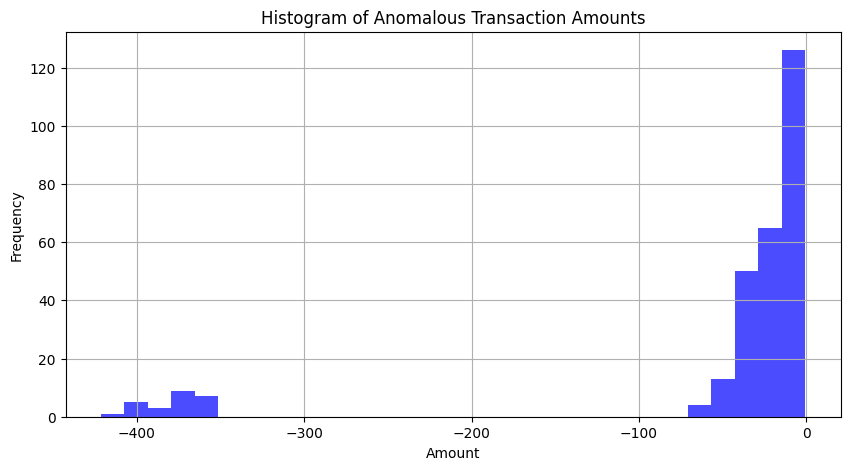

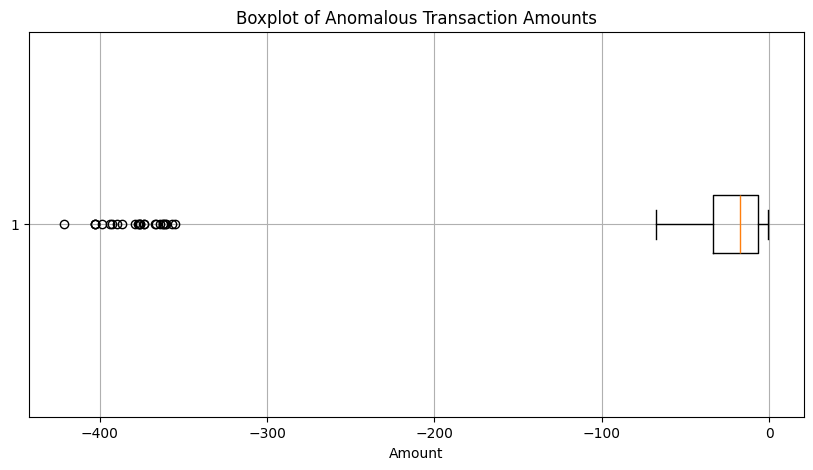

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(anomalous_transactions['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(anomalous_transactions['Amount'], vert=False)
plt.title('Boxplot of Anomalous Transaction Amounts')
plt.xlabel('Amount')
plt.grid(True)
plt.show()


In [56]:
anomalous_transactions[anomalous_transactions['Account No'] == 581655972.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend
97465,581655972.0,2023-08-02 09:02:00,35147.072609,-5.70,Coffee #1,08-02,False,2023-08-02,09:02:00,-3405.421154,True,2,9,False
98306,581655972.0,2023-08-03 17:44:00,35135.092609,-11.98,The Works,08-03,False,2023-08-03,17:44:00,-3416.648282,True,3,17,False
98394,581655972.0,2023-08-03 20:42:00,35103.876201,-31.22,Amazon,08-03,False,2023-08-03,20:42:00,-3440.087684,True,3,20,False
98914,581655972.0,2023-08-04 20:54:00,35090.128170,-8.70,AMAZON,08-04,False,2023-08-04,20:54:00,-3486.888681,True,4,20,False
99671,581655972.0,2023-08-06 09:57:00,34994.143717,-7.26,AMAZON,08-06,False,2023-08-06,09:57:00,-3467.557832,True,6,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164475,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,2023-12-04,02:18:00,-4050.224055,True,0,2,False
164688,581655972.0,2023-12-04 09:08:00,46003.893429,-6.50,Coffee #1,12-04,False,2023-12-04,09:08:00,-4470.502764,True,0,9,False
165283,581655972.0,2023-12-05 06:07:00,45982.164323,-21.73,Selfridges,12-05,False,2023-12-05,06:07:00,-4452.271929,True,1,6,False
165379,581655972.0,2023-12-05 09:03:00,45976.264323,-5.90,Coffee #1,12-05,False,2023-12-05,09:03:00,-4468.841255,True,1,9,False


# find threshold for large amouth


In [57]:
data

,Account No,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time
0,657139925.0,122.160000,-19.89,Deliveroo,01-01,True,2023-01-01,05:30:00
1,546760202.0,840.570000,-27.45,JustEat,01-01,True,2023-01-01,05:41:00
2,435313070.0,1318.357427,-1.65,Coop Local,01-01,True,2023-01-01,06:45:00
3,804317849.0,1457.668654,-55.37,Selfridges,01-01,True,2023-01-01,07:03:00
4,486495235.0,916.023058,-22.02,Sainsbury,01-01,True,2023-01-01,07:46:00
...,...,...,...,...,...,...,...,...
166221,581655972.0,45935.206861,-41.06,Tesco,12-06,False,2023-12-06,20:54:00
166222,786141370.0,-244.837500,-62.35,Sainsbury Local,12-06,False,2023-12-06,20:55:00
166223,824916823.0,9709.172159,-32.94,Deliveroo,12-06,False,2023-12-06,21:05:00
166224,366550080.0,26834.165794,-19.25,Amazon,12-06,False,2023-12-06,21:13:00


In [58]:
# cal mean and standard deviation for each third party
stats = data.groupby('Third Party Name')['Amount'].agg(['mean', 'std']).reset_index()
stats['Upper_Threshold'] = stats['mean'] + 3 * stats['std']
stats['Lower_Threshold'] = stats['mean'] - 3 * stats['std']

In [59]:
stats

,Third Party Name,mean,std,Upper_Threshold,Lower_Threshold
0,A Cut Above,-200.000000,NaN,NaN,NaN
1,A Yarn Story,-24.543714,23.789335,46.824290,-95.911719
2,AMAZON,-23.595310,19.768335,35.709696,-82.900316
3,Amazon,-23.245459,19.446041,35.092665,-81.583582
4,Barbiee Boutique,-270.000000,NaN,NaN,NaN
...,...,...,...,...,...
60,Town High,-140.000000,28.284271,-55.147186,-224.852814
61,University College Hospital,-80.000000,NaN,NaN,NaN
62,Victoria Park,-290.000000,NaN,NaN,NaN
63,Vision Express,-220.000000,NaN,NaN,NaN


In [60]:
#  thresholds for unusual times and large amounts
unusual_hour_start = 0  # Midnight
unusual_hour_end = 5    # 5 AM
large_amount_threshold = 200 

anomalous_transactions = anomalous_transactions.merge(stats[['Third Party Name', 'Upper_Threshold', 'Lower_Threshold']], on='Third Party Name', how='left')

# flag transactions based on the calculated thresholds
anomalous_transactions['Unusual_Hour'] = anomalous_transactions['HourOfDay'].apply(lambda x: unusual_hour_start <= x <= unusual_hour_end)
anomalous_transactions['Large_Amount'] = anomalous_transactions.apply(lambda row: row['Amount'] > row['Upper_Threshold'] or row['Amount'] < row['Lower_Threshold'], axis=1)
anomalous_transactions['Potential_Fraud'] = anomalous_transactions.apply(lambda row: row['Is_Anomaly'] and (row['Unusual_Hour'] or row['Large_Amount']), axis=1)

# filter and display potentially fraudulent transactions
flagged_transactions = anomalous_transactions[anomalous_transactions['Potential_Fraud']]
flagged_transactions

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
0,116169597.0,2023-01-01 12:15:00,-309.336000,-363.99,Fat Face,01-01,True,2023-01-01,12:15:00,-3474.402571,True,6,12,True,119.523443,-325.979363,False,True,True
1,358836279.0,2023-01-06 11:13:00,1028.960806,-392.70,Fat Face,01-06,False,2023-01-06,11:13:00,-3647.754527,True,4,11,False,119.523443,-325.979363,False,True,True
2,552980092.0,2023-01-13 09:55:00,249.362719,-375.90,Fat Face,01-13,False,2023-01-13,09:55:00,-3574.825754,True,4,9,False,119.523443,-325.979363,False,True,True
3,918772878.0,2023-02-06 13:24:00,-605.609517,-366.10,Revella,02-06,False,2023-02-06,13:24:00,-3515.349948,True,0,13,False,133.861500,-307.503505,False,True,True
4,310620484.0,2023-02-20 16:44:00,-547.346089,-366.79,Topshop,02-20,False,2023-02-20,16:44:00,-3524.657545,True,0,16,False,116.513284,-323.859071,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,639409800.0,2023-12-04 02:13:00,40535.870529,-17.70,Fitted Stitch,12-04,False,2023-12-04,02:13:00,-4074.677297,True,0,2,False,133.851760,-235.971556,True,False,True
265,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,2023-12-04,02:18:00,-4050.224055,True,0,2,False,116.513284,-323.859071,True,False,True
266,386729293.0,2023-12-04 05:23:00,35535.722448,-5.36,Sainsbury,12-04,False,2023-12-04,05:23:00,-3527.578072,True,0,5,False,86.336765,-173.726221,True,False,True
274,639409800.0,2023-12-05 05:34:00,40464.192483,-31.30,Tesco,12-05,False,2023-12-05,05:34:00,-3931.642360,True,1,5,False,77.786268,-227.886351,True,False,True


In [61]:
flagged_transactions = flagged_transactions[(flagged_transactions['Potential_Fraud']) & (flagged_transactions['Amount']<=0)]

In [62]:
flagged_transactions


,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
0,116169597.0,2023-01-01 12:15:00,-309.336000,-363.99,Fat Face,01-01,True,2023-01-01,12:15:00,-3474.402571,True,6,12,True,119.523443,-325.979363,False,True,True
1,358836279.0,2023-01-06 11:13:00,1028.960806,-392.70,Fat Face,01-06,False,2023-01-06,11:13:00,-3647.754527,True,4,11,False,119.523443,-325.979363,False,True,True
2,552980092.0,2023-01-13 09:55:00,249.362719,-375.90,Fat Face,01-13,False,2023-01-13,09:55:00,-3574.825754,True,4,9,False,119.523443,-325.979363,False,True,True
3,918772878.0,2023-02-06 13:24:00,-605.609517,-366.10,Revella,02-06,False,2023-02-06,13:24:00,-3515.349948,True,0,13,False,133.861500,-307.503505,False,True,True
4,310620484.0,2023-02-20 16:44:00,-547.346089,-366.79,Topshop,02-20,False,2023-02-20,16:44:00,-3524.657545,True,0,16,False,116.513284,-323.859071,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,639409800.0,2023-12-04 02:13:00,40535.870529,-17.70,Fitted Stitch,12-04,False,2023-12-04,02:13:00,-4074.677297,True,0,2,False,133.851760,-235.971556,True,False,True
265,581655972.0,2023-12-04 02:18:00,46010.393429,-48.11,Topshop,12-04,False,2023-12-04,02:18:00,-4050.224055,True,0,2,False,116.513284,-323.859071,True,False,True
266,386729293.0,2023-12-04 05:23:00,35535.722448,-5.36,Sainsbury,12-04,False,2023-12-04,05:23:00,-3527.578072,True,0,5,False,86.336765,-173.726221,True,False,True
274,639409800.0,2023-12-05 05:34:00,40464.192483,-31.30,Tesco,12-05,False,2023-12-05,05:34:00,-3931.642360,True,1,5,False,77.786268,-227.886351,True,False,True


In [63]:
flagged_transactions.shape

(83, 19)

In [64]:
# show stats of 'Third Party Name'
transaction_stats = flagged_transactions.groupby('Account No').agg({
    'Amount': ['mean', 'std', 'count', 'sum'],
    'Anomaly Score': ['mean', 'min', 'max']
}).reset_index()

transaction_stats


Account No      Amount                          Anomaly Score  \
                       mean        std count     sum          mean   
0   116169597.0 -363.990000        NaN     1 -363.99  -3474.402571   
1   116598243.0 -402.500000        NaN     1 -402.50  -3538.245309   
2   154246234.0 -386.400000        NaN     1 -386.40  -3693.335199   
3   184430449.0 -389.900000        NaN     1 -389.90  -3704.716269   
4   212560376.0 -357.000000        NaN     1 -357.00  -3421.313610   
5   223207876.0 -402.500000        NaN     1 -402.50  -3792.340570   
6   248625662.0 -394.100000        NaN     1 -394.10  -3772.228462   
7   299652176.0 -377.300000        NaN     1 -377.30  -3598.987022   
8   310620484.0 -366.790000        NaN     1 -366.79  -3524.657545   
9   358836279.0 -392.700000        NaN     1 -392.70  -3647.754527   
10  385685918.0 -361.200000        NaN     1 -361.20  -3467.392852   
11  386729293.0   -5.360000        NaN     1   -5.36  -3527.578072   
12  409971170.0 -421.400000        NaN     1 -421.40  -3695.862059   
13  519933553.0 -402.500000        NaN     1 -402.50  -3830.669069   
14  552980092.0 -375.900000        NaN     1 -375.90  -3574.825754   
15  558119802.0  -18.000000  13.962181     9 -162.00  -3490.158849   
16  581655972.0  -21.477586  18.859022    29 -622.85  -3914.918661   
17  586041848.0 -375.900000        NaN     1 -375.90  -3579.458549   
18  603375739.0 -398.300000        NaN     1 -398.30  -3766.159327   
19  621181115.0 -361.900000        NaN     1 -361.90  -3477.263844   
20  639409800.0  -18.304000  15.121954    15 -274.56  -3671.861635   
21  673025413.0 -373.800000        NaN     1 -373.80  -3476.558751   
22  709935470.0 -354.900000        NaN     1 -354.90  -3406.423078   
23  718058208.0 -361.900000        NaN     1 -361.90  -3408.393146   
24  722971557.0 -373.800000        NaN     1 -373.80  -3582.025510   
25  867987292.0 -378.700000        NaN     1 -378.70  -3485.712281   
26  879091637.0 -376.600000        NaN     1 -376.60  -3593.593196   
27  913127700.0 -360.500000        NaN     1 -360.50  -3462.692960   
28  918772878.0 -366.100000        NaN     1 -366.10  -3515.349948   
29  975345315.0  -28.567500  21.562108     4 -114.27  -3808.583715   

                              
            min          max  
0  -3474.402571 -3474.402571  
1  -3538.245309 -3538.245309  
2  -3693.335199 -3693.335199  
3  -3704.716269 -3704.716269  
4  -3421.313610 -3421.313610  
5  -3792.340570 -3792.340570  
6  -3772.228462 -3772.228462  
7  -3598.987022 -3598.987022  
8  -3524.657545 -3524.657545  
9  -3647.754527 -3647.754527  
10 -3467.392852 -3467.392852  
11 -3527.578072 -3527.578072  
12 -3695.862059 -3695.862059  
13 -3830.669069 -3830.669069  
14 -3574.825754 -3574.825754  
15 -3749.165534 -3404.411149  
16 -4430.849869 -3472.009903  
17 -3579.458549 -3579.458549  
18 -3766.159327 -3766.159327  
19 -3477.263844 -3477.263844  
20 -4074.677297 -3406.764513  
21 -3476.558751 -3476.558751  
22 -3406.423078 -3406.423078  
23 -3408.393146 -3408.393146  
24 -3582.025510 -3582.025510  
25 -3485.712281 -3485.712281  
26 -3593.593196 -3593.593196  
27 -3462.692960 -3462.692960  
28 -3515.349948 -3515.349948  
29 -4123.744939 -3482.055310

In [65]:
flagged_transactions[flagged_transactions['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount,Third Party Name,month_day,Holiday,Date,Time,Anomaly Score,Is_Anomaly,DayofWeek,HourOfDay,IsWeekend,Upper_Threshold,Lower_Threshold,Unusual_Hour,Large_Amount,Potential_Fraud
119,558119802.0,2023-10-31 05:46:00,36557.567655,-29.08,Tesco,10-31,False,2023-10-31,05:46:00,-3559.129118,True,1,5,False,77.786268,-227.886351,True,False,True
124,558119802.0,2023-11-01 01:12:00,35428.749046,-2.13,Fat Face,11-01,False,2023-11-01,01:12:00,-3458.976246,True,2,1,False,119.523443,-325.979363,True,False,True
136,558119802.0,2023-11-03 05:46:00,35423.079821,-1.47,Tesco,11-03,False,2023-11-03,05:46:00,-3444.738552,True,4,5,False,77.786268,-227.886351,True,False,True
147,558119802.0,2023-11-05 04:39:00,35206.600954,-26.94,JustEat,11-05,False,2023-11-05,04:39:00,-3472.213824,True,6,4,True,-0.381310,-55.999805,True,False,True
153,558119802.0,2023-11-06 04:15:00,35177.393148,-24.30,Deliveroo,11-06,False,2023-11-06,04:15:00,-3479.725656,True,0,4,False,-0.192623,-56.254324,True,False,True
165,558119802.0,2023-11-09 02:31:00,34601.736227,-19.45,JustEat,11-09,False,2023-11-09,02:31:00,-3422.208812,True,3,2,False,-0.381310,-55.999805,True,False,True
166,558119802.0,2023-11-09 03:02:00,34595.397187,-6.34,Amazon,11-09,False,2023-11-09,03:02:00,-3404.411149,True,3,3,False,35.092665,-81.583582,True,False,True
173,558119802.0,2023-11-10 04:20:00,34585.399449,-10.00,Amazon,11-10,False,2023-11-10,04:20:00,-3420.860747,True,4,4,False,35.092665,-81.583582,True,False,True
243,558119802.0,2023-11-30 04:52:00,39449.662831,-42.29,Selfridges,11-30,False,2023-11-30,04:52:00,-3749.165534,True,3,4,False,139.821099,-253.022612,True,False,True


In [66]:
clean_data[clean_data['Account No'] == 558119802.0]

,Account No,DateTime,Balance,Amount
875,558119802.0,2023-01-01 00:00:00,-282.000000,-1034.00
3793,558119802.0,2023-01-01 00:00:00,-297.990000,-15.99
3794,558119802.0,2023-01-01 00:00:00,-305.980000,-7.99
4868,558119802.0,2023-01-01 10:32:00,-376.922200,-70.94
7470,558119802.0,2023-01-04 20:37:00,-446.467900,-69.55
...,...,...,...,...
227995,558119802.0,2023-12-03 08:16:00,37865.633356,-66.21
228641,558119802.0,2023-12-04 08:53:00,37854.843690,-10.79
229097,558119802.0,2023-12-04 19:20:00,37820.713690,-34.13
229272,558119802.0,2023-12-05 06:52:00,37789.800739,-30.91


Common Third Party Names in Flagged Transactions:
 Third Party Name
Fat Face           14
Amazon             13
Topshop            10
Revella             7
Sainsbury Local     6
Fitted Stitch       5
Lloyds Pharmacy     4
Tesco               3
Loosely Fitted      3
JustEat             3
Etsy                3
Matalan             3
Sainsbury           2
Boots               2
Selfridges          2
AMAZON              2
Deliveroo           1
Name: count, dtype: int64


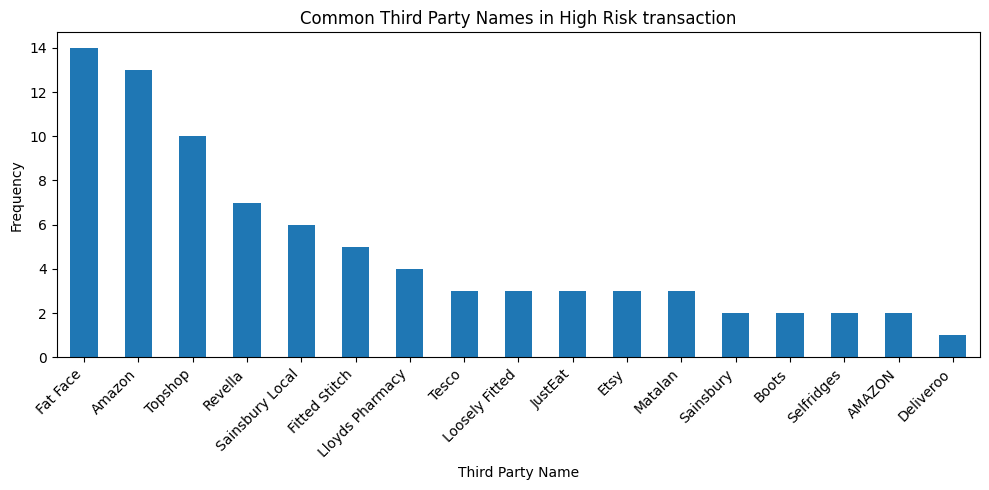

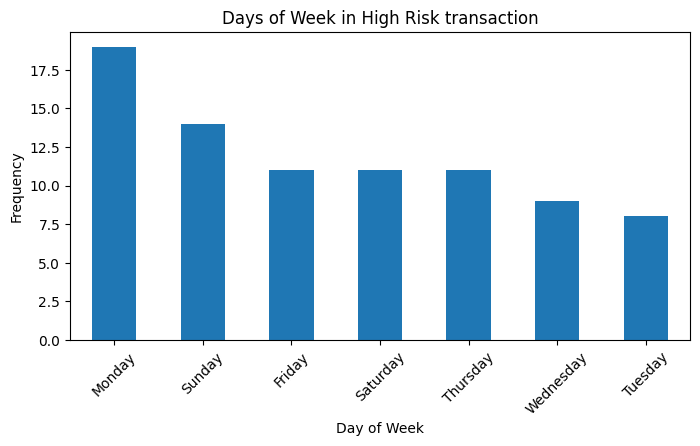

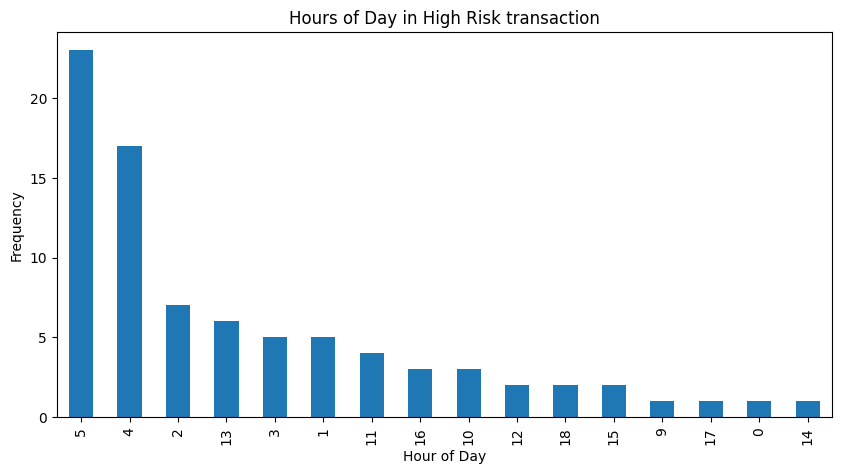

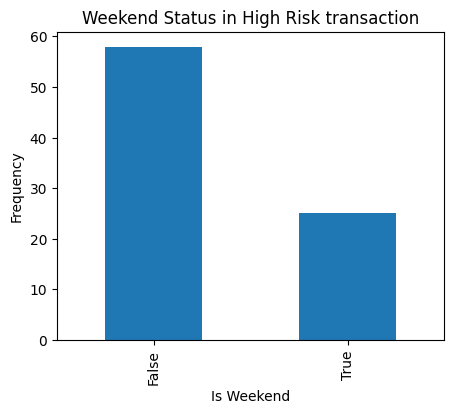

In [67]:
common_third_party_names = flagged_transactions['Third Party Name'].value_counts()
common_days = flagged_transactions['DayofWeek'].value_counts()
common_hours = flagged_transactions['HourOfDay'].value_counts()
common_weekend_status = flagged_transactions['IsWeekend'].value_counts()

print("Common Third Party Names in Flagged Transactions:\n", common_third_party_names)


plt.figure(figsize=(10, 5))
common_third_party_names.plot(kind='bar')
plt.title('Common Third Party Names in High Risk transaction')
plt.xlabel('Third Party Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
common_days.index = common_days.index.map(day_of_week_map)


plt.figure(figsize=(8, 4))
common_days.plot(kind='bar')
plt.title('Days of Week in High Risk transaction')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
common_hours.plot(kind='bar')
plt.title('Hours of Day in High Risk transaction')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5, 4))
common_weekend_status.plot(kind='bar')
plt.title('Weekend Status in High Risk transaction')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.show()
